In [2]:
import rasterio as rio
import matplotlib.pyplot as plt
import geopandas as gpd
import os

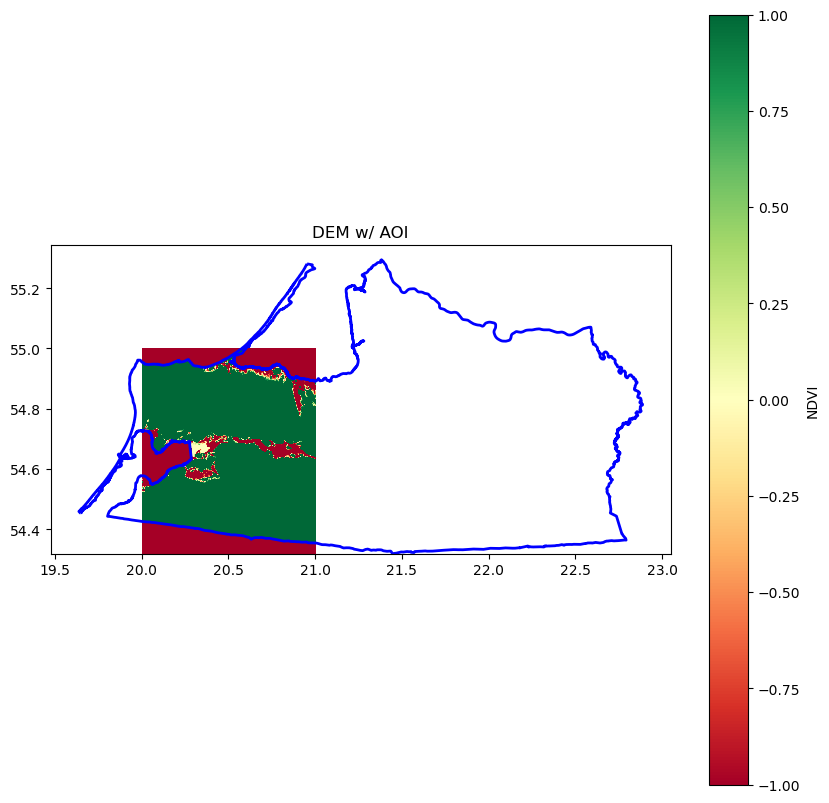

In [5]:
dem_path = r"C:\Users\bzwil\OneDrive\Desktop\KaliningradProject\kaliningrad-geoint-change-detection\files\data\dem\kaliningrad_dem_clipped.tif"
with rio.open(dem_path) as src:
    ndvi_data = src.read(1)
    extent = src.bounds
    transform = src.transform
    raster_crs = src.crs

aoi = gpd.read_file(r"C:\Users\bzwil\OneDrive\Desktop\KaliningradProject\kaliningrad-geoint-change-detection\files\data\kaliningrad-oblast.geojson")
aoi = aoi.to_crs(raster_crs)

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(ndvi_data, cmap='RdYlGn', vmin=-1, vmax=1,
                extent=[extent.left, extent.right, extent.bottom, extent.top])
aoi.boundary.plot(ax=ax, edgecolor='blue', linewidth=2)
fig.colorbar(cax, label="NDVI")

ax.set_title("DEM w/ AOI")
plt.axis("on")
plt.show()